# Otimização com o Algoritmo de Seleção Clonal (CLONALG)

## 1. Introdução

### Knapsack Problem Example

Neste notebook, aplica o ClonAlg ao **Problema da Mochila (Knapsack Problem)** 
usando algoritmos de otimização do pacote AISP.

O problema consiste em escolher itens com valores e pesos, de modo a maximizar o valor total 
sem ultrapassar a capacidade da mochila.

## 2. Configuração

### Instalação das bibliotecas necessários.

In [ ]:
%pip install matplotlib
%pip install aisp

### Importação das bibliotecas necessárias

In [1]:
# Importando o Algoritmo de Seleção Clonal (CLONALG)
from aisp.csa import Clonalg

# Bibliotecas para manipulação de dados e cálculos numéricos
import numpy as np
from itertools import product

# Visualização de dados
import matplotlib.pyplot as plt

## 3. Definição do problema

Cria 20 itens, cada um com um peso e um valor, considerando uma mochila com capacidade de 435, e defina a função ``knapsack_fitness``, que será passada para o **Clonalg** a fim de avaliar a afinidade dos anticorpos.

In [2]:
rng = np.random.default_rng(1234)

n_items = 20
weights = rng.integers(10, 101, size=n_items).tolist()
values = rng.integers(100, 501, size=n_items).tolist()

capacity = 435


# Função de fitness
def knapsack_fitness(solution):
    total_weight = np.sum(weights * solution)
    total_value = np.sum(values * solution)
    
    # Se exceder a capacidade, aplicar penalidade
    if total_weight > capacity:
        excess = total_weight - capacity
        penalty = -excess * np.max(values) * 2
        return total_value + penalty
    
    return total_value

print("Pesos:", weights)
print("Valores:", values)
print("Capacidade:", capacity)

Pesos: [99, 98, 99, 44, 25, 94, 19, 33, 22, 39, 58, 20, 82, 32, 81, 38, 82, 97, 97, 33]
Valores: [322, 276, 202, 344, 459, 446, 359, 446, 307, 370, 482, 364, 118, 395, 396, 189, 447, 168, 416, 449]
Capacidade: 435


## 4. Configuração do algoritmo

In [3]:
# Instancia o ClonAlg para problemas binários
clonalg = Clonalg(
    problem_size=n_items,
    N=100,
    selection_size=15,
    rate_clonal=30,
    rate_hypermutation=3,
    n_diversity_injection=20,
    feature_type='binary-features',
    seed=1234,
    mode="max"
)

clonalg.register('affinity_function', knapsack_fitness)

## 5. Rodando a otimização

In [4]:
clonalg.optimize(100, 5)

if clonalg.best_cost is not None:
	print('Best cost:', abs(clonalg.best_cost))


┌───────────┬─────────────────────────┬────────────────────┬─────────────────┐
│ Iteration │   Best Affinity (max)   │   Worse Affinity   │   Stagnation    │
├───────────┼─────────────────────────┼────────────────────┼─────────────────┤
│     1     │              3187.000000│      -396046.000000│        0        │
│     2     │              3633.000000│      -315758.000000│        0        │
│     3     │              4134.000000│      -129499.000000│        0        │
│     4     │              4210.000000│      -194613.000000│        0        │
│     5     │              4210.000000│       -21193.000000│        1        │
│     6     │              4210.000000│      -556395.000000│        2        │
│     7     │              4391.000000│      -262486.000000│        0        │
│     8     │              4391.000000│      -318309.000000│        1        │
│     9     │              4421.000000│       -53687.000000│        0        │
│    10     │              4421.000000│       -5282

## 6. Resultado

In [5]:
print(clonalg.get_report())


            Optimization Summary             
Best cost      : 4422
Best solution  : [False False False  True  True False  True  True  True  True  True  True
 False  True False False  True False False  True]
Cost History per Iteration:

┌────────────┬────────────────────────────┐
│ Iteration  │            Cost            │
├────────────┼────────────────────────────┤
│          1 │                3187.000000 │
│          2 │                3633.000000 │
│          3 │                4134.000000 │
│          4 │                4210.000000 │
│          5 │                4210.000000 │
│          6 │                4210.000000 │
│          7 │                4391.000000 │
│          8 │                4391.000000 │
│          9 │                4421.000000 │
│         10 │                4421.000000 │
│         11 │                4421.000000 │
│         12 │                4422.000000 │
│         13 │                4422.000000 │
│         14 │                4422.000000 │
│         15 │

### 6.1 Evolução do melhor ao longo das gerações

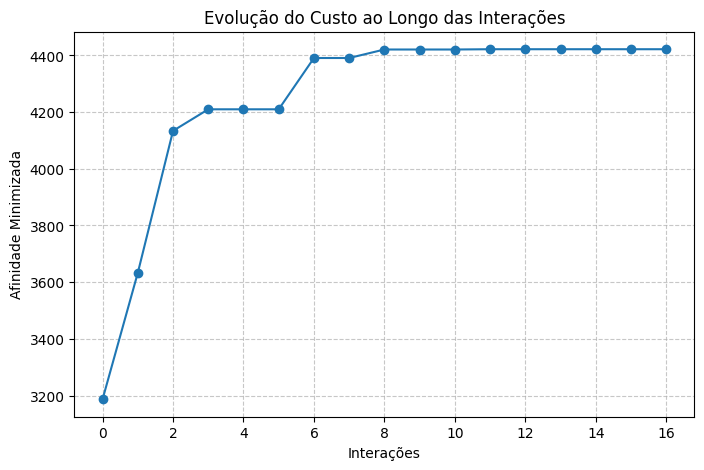

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(clonalg.cost_history, marker='o')
plt.title('Evolução do Custo ao Longo das Interações')
plt.xlabel('Interações')
plt.ylabel('Afinidade Minimizada')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 6.2 Comparação com Força Bruta

O código a seguir implementa uma abordagem de força bruta. Ele funciona testando todas as combinações possíveis de inclusão ou exclusão de itens na mochila.

In [7]:
best_value = 0
best_solution = None

for solution in product([0,1], repeat=n_items):
    solution = np.array(solution)
    total_weight = np.sum(solution * weights)
    total_value  = np.sum(solution * values)
    
    if total_weight <= capacity and total_value > best_value:
        best_value = total_value
        best_solution = solution

itens_escolhidos = np.where(best_solution == 1)[0].tolist()
qtd_itens_bruta = len(itens_escolhidos)
peso_bruta = np.dot(best_solution, weights) # type: ignore

# ==== Solução Clonalg ====
clonalg_solution = np.array(clonalg.best_solution, dtype=int)
itens_clonalg = np.where(clonalg_solution == 1)[0].tolist()
qtd_itens_clonalg = len(itens_clonalg)
peso_clonalg = np.dot(clonalg_solution, weights)

# ==== Impressão dos resultados ====
print("\n===== RESULTADOS =====\n")
print("Força bruta")
print(f"- Itens escolhidos : {itens_escolhidos}")
print(f"- Quantidade itens : {qtd_itens_bruta}")
print(f"- Valor total      : {best_value}")
print(f"- Peso total       : {peso_bruta}")

print("\nClonalg")
print(f"- Itens escolhidos : {itens_clonalg}")
print(f"- Quantidade itens : {qtd_itens_clonalg}")
print(f"- Valor total      : {clonalg.best_cost}")
print(f"- Peso total       : {peso_clonalg}")


===== RESULTADOS =====

Força bruta
- Itens escolhidos : [3, 4, 6, 7, 8, 9, 10, 11, 13, 16, 19]
- Quantidade itens : 11
- Valor total      : 4422
- Peso total       : 407

Clonalg
- Itens escolhidos : [3, 4, 6, 7, 8, 9, 10, 11, 13, 16, 19]
- Quantidade itens : 11
- Valor total      : 4422
- Peso total       : 407
